In [89]:
import pandas as pd
import numpy as np
%matplotlib inline

In [12]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [13]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

/Users/williamcornejo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [16]:
#df = df.drop(columns=['INTKEY', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'INATTENTIONIND', 'PEDROWNOTGRNT', 'SPEEDING'])
#df = df.drop(columns=['PEDROWNOTGRNT', 'SPEEDING'])
df = df.drop(columns=['PEDROWNOTGRNT', 'SPEEDING'])

KeyError: "labels ['PEDROWNOTGRNT' 'SPEEDING'] not contained in axis"

In [18]:
missing_data = df.isnull()
missing_data.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,LOCATION,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SDOTCOLNUM,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

In [21]:
avg_X = df['X'].astype('float').mean(axis=0)
#print("Average X:", avg_X)

In [22]:
df['X'].replace(np.nan, avg_X, inplace=True)

In [26]:
avg_Y = df['Y'].astype('float').mean(axis=0)
print("Average Y:", avg_Y)
df['Y'].replace(np.nan, avg_Y, inplace=True)

Average Y: 47.619542517688615


In [27]:
df['ADDRTYPE'].value_counts().idxmax()

'Block'

In [28]:
df["ADDRTYPE"].replace(np.nan, "BLOCK", inplace=True)

In [29]:
df['LOCATION'].value_counts().idxmax()

'BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N'

In [30]:
df["LOCATION"].replace(np.nan, "BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N", inplace=True)

In [31]:
df['COLLISIONTYPE'].value_counts().idxmax()

'Parked Car'

In [32]:
df["COLLISIONTYPE"].replace(np.nan, "Parked Car", inplace=True)

In [33]:
df['JUNCTIONTYPE'].value_counts().idxmax()

'Mid-Block (not related to intersection)'

In [34]:
df["JUNCTIONTYPE"].replace(np.nan, "Mid-Block (not related to intersection)", inplace=True)

In [35]:
df['UNDERINFL'].value_counts().idxmax()

'N'

In [36]:
df["UNDERINFL"].replace(np.nan, "N", inplace=True)

In [37]:
df["WEATHER"].value_counts().idxmax()

'Clear'

In [38]:
df["WEATHER"].replace(np.nan, "Clear", inplace=True)

In [39]:
df["ROADCOND"].value_counts().idxmax()

'Dry'

In [40]:
df["ROADCOND"].replace(np.nan, "Dry", inplace=True)

In [41]:
df["LIGHTCOND"].value_counts().idxmax()

'Daylight'

In [42]:
df["LIGHTCOND"].replace(np.nan, "Daylight", inplace=True)

In [43]:
df["SDOTCOLNUM"].value_counts().idxmax()
avg_SDOT = df['SDOTCOLNUM'].astype('float').mean(axis=0)
print("Average SDOT:", avg_SDOT)
df['SDOTCOLNUM'].replace(np.nan, avg_SDOT, inplace=True)

Average SDOT: 7972521.3371441495


In [73]:

df['ST_COLCODE'].replace(np.nan, 32, inplace=True)

df['ST_COLDESC'].replace(np.nan, 'One parked--one moving', inplace=True)

In [74]:
missing_data = df.isnull()
missing_data.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,LOCATION,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SDOTCOLNUM,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    194673
Name: X, dtype: int64

Y
False    194673
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    194673
Name: ADDRTYPE, dtype: int64

LOCATION
False    194673
Name: LOCATION, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    194673
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

INCDATE
False    194673
Name: INCDATE, dtype: int

In [79]:
print(df.shape)
print(df.columns)
df['SEVERITYCODE'].value_counts()

(194673, 32)
Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SDOTCOLNUM',
       'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'],
      dtype='object')


1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [81]:
X = np.asarray(df[['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SDOTCOLNUM',
       'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR']])
X[0:1]

array([[2, -122.32314840000002, 47.70314032, 1, 1307, 1307, '3502005',
        'Matched', 'Intersection', '5TH AVE NE AND NE 103RD ST', 2,
        'Injury Collision', 'Angles', 2, 0, 0, 2,
        '2013/03/27 00:00:00+00', '3/27/2013 2:54:00 PM',
        'At Intersection (intersection related)', 11,
        'MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE', 'N',
        'Overcast', 'Wet', 'Daylight', 7972521.3371441495, '10',
        'Entering at angle', 0, 0, 'N']], dtype=object)

In [82]:
y = np.asarray(df['SEVERITYCODE'])
y [0:5]

array([2, 1, 1, 1, 2])

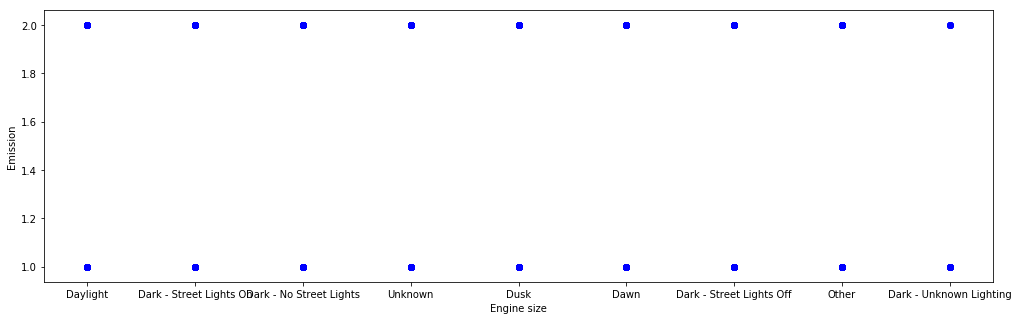

In [99]:

import matplotlib.pyplot as plt
plt.figure(figsize = (17, 5))
plt.scatter(df.LIGHTCOND, y,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [101]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,LOCATION,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SDOTCOLNUM,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,5TH AVE NE AND NE 103RD ST,...,N,Overcast,Wet,Daylight,7.972521e+06,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,...,0,Raining,Wet,Dark - Street Lights On,6.354039e+06,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,...,0,Overcast,Dry,Daylight,4.323031e+06,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,...,N,Clear,Dry,Daylight,7.972521e+06,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,...,0,Raining,Wet,Daylight,4.028032e+06,10,Entering at angle,0,0,N


In [103]:
#df['HITPARKEDCAR'] = df['HITPARKEDCAR'].astype('int')
#churn_df.head()

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (155738, 32) (155738,)
Test set: (38935, 32) (38935,)


In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

ValueError: could not convert string to float: 'N'